## Implanting K-means clustering algorithm

In [78]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# read data 
data = pd.read_csv('cluster_data1.csv')

In [80]:
# check head elements
data.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [81]:
# check tail elements
data.tail()

,X1,X2,X3,X4
145,5.4,3.9,1.3,0.4
146,5.3,3.7,1.5,0.2
147,6.1,2.6,5.6,1.4
148,5.7,3.8,1.7,0.3
149,5.4,3.4,1.7,0.2


In [82]:
# set random seed
np.random.seed(123)
data.sample(n=3)

,X1,X2,X3,X4
72,5.2,3.5,1.5,0.2
112,4.8,3.4,1.9,0.2
132,7.2,3.6,6.1,2.5


In [83]:
np.random.seed(123)

In [84]:
# extract columns 
X = data[['X1', 'X2', 'X3', 'X4']].values

In [85]:
# initial K and random centriods base random seed 123
K = 3
centroids = X[np.random.choice(X.shape[0], K, replace=False)]
centroids

array([[5.2, 3.5, 1.5, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [7.2, 3.6, 6.1, 2.5]])

In [86]:
# euclidean distance
def euclidean_distance(X, centroids):
    return np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))

In [87]:
# assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = euclidean_distance(X, centroids)
    return np.argmin(distances, axis=1)

In [88]:
# recompute the centroids
def recompute_centroids(X, labels, K):
    return np.array([X[labels == k].mean(axis=0) for k in range(K)])

In [89]:
# initial plot function without cluster assignment
def plot_initial(X, centroids, title):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='brown')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()


In [90]:
# plot clusters and centroids
def plot(X, centroids, clusters, title):
    plt.figure()
    for k in range(len(centroids)):
        plt.scatter(X[clusters == k, 0], X[clusters == k, 1], alpha=0.6, label=f'Cluster {k}')
        plt.scatter(centroids[k, 0], centroids[k, 1], s=100, c='brown', label=f'Centroid {k}')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [91]:
# K-means algorithm
def kmeans(X, centroids, K, max_iters=4):
    for i in range(1, max_iters+1):
        # assign clusters
        labels = assign_clusters(X, centroids)

        # plot clusters and centroids for each iteration
        plot(X, centroids, labels, f'Iteration {i}')

        # recompute centroids
        new_centroids = recompute_centroids(X, labels, K)

        # if centroids do not change, stop
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {i+1}")
            break

        # update centroids
        centroids = new_centroids

    return centroids, labels


/var/folders/nw/5jczsr7n7839c78n5_1bk4m00000gn/T/ipykernel_73393/1902254.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


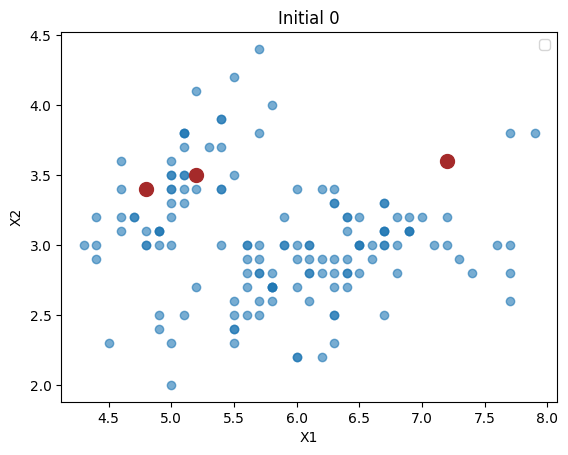

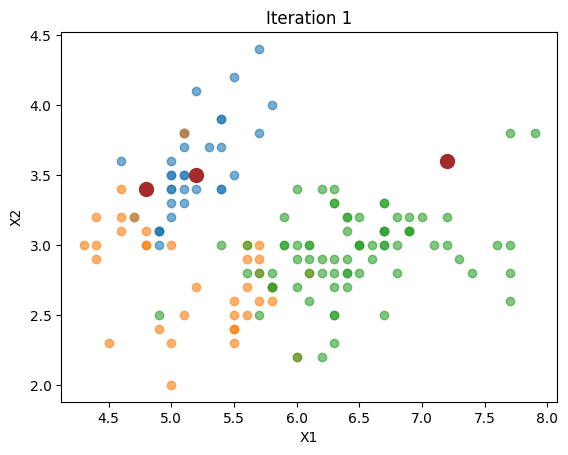

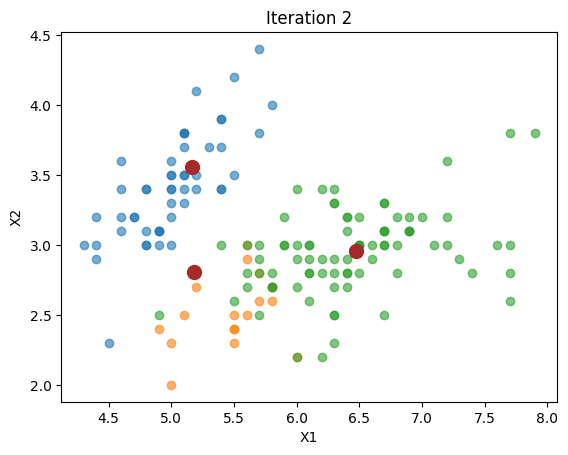

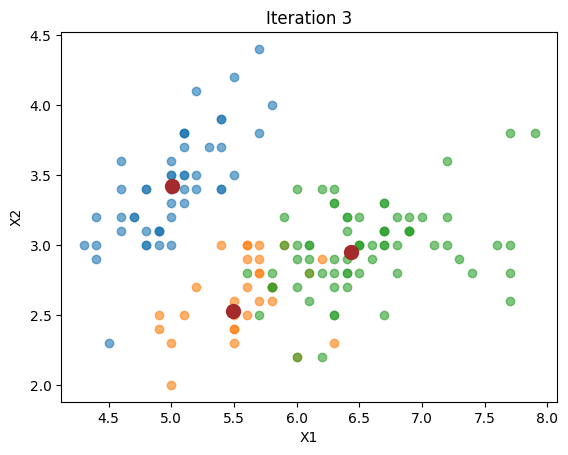

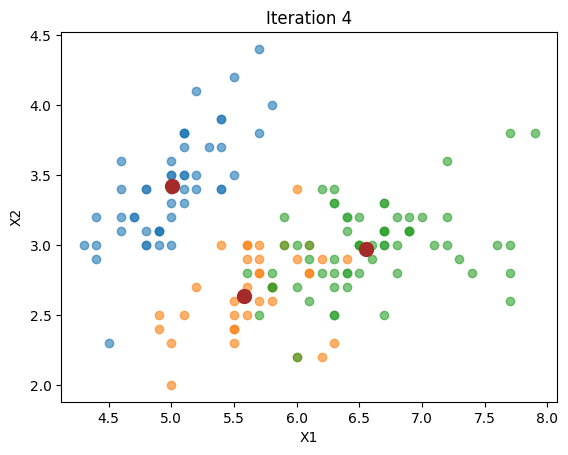

In [92]:
# plot the initial centroids before any cluster assignment
plot_initial(X, centroids, "Initial 0")

# plot and run the K-means algorithm
final_centroids, final_labels = kmeans(X, centroids, K)

## Implanting K-means++ clustering algorithm and finding K

In [93]:
# random seed 123
np.random.seed(123)

In [94]:
# initial centroid randomly
centroids = [X[np.random.choice(X.shape[0])]]
centroids

[array([5.6, 2.5, 3.9, 1.1])]

/var/folders/nw/5jczsr7n7839c78n5_1bk4m00000gn/T/ipykernel_73393/1902254.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


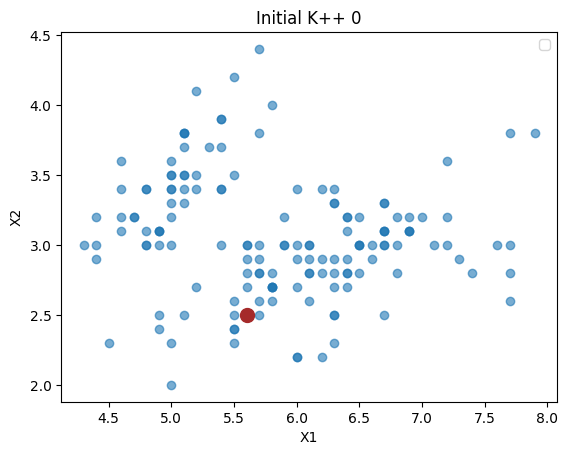

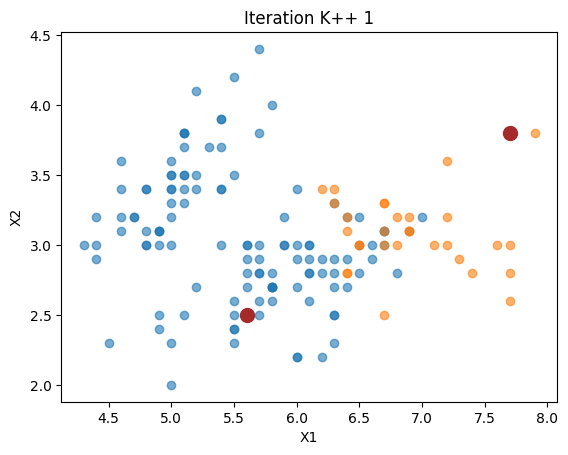

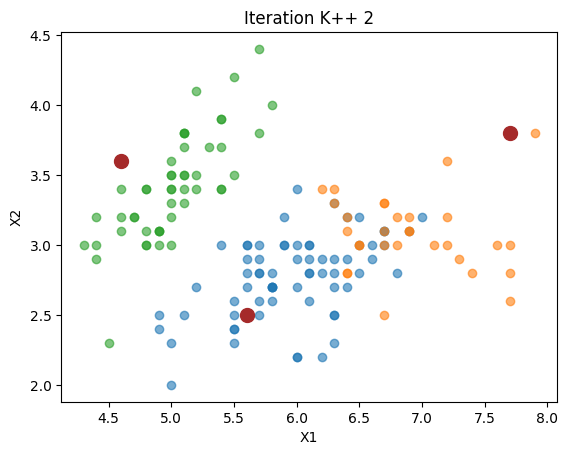

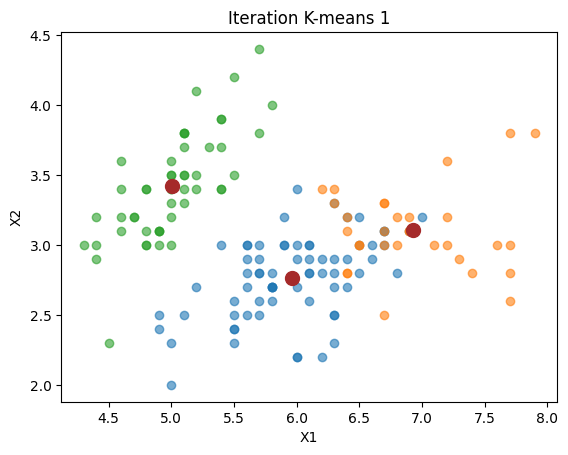

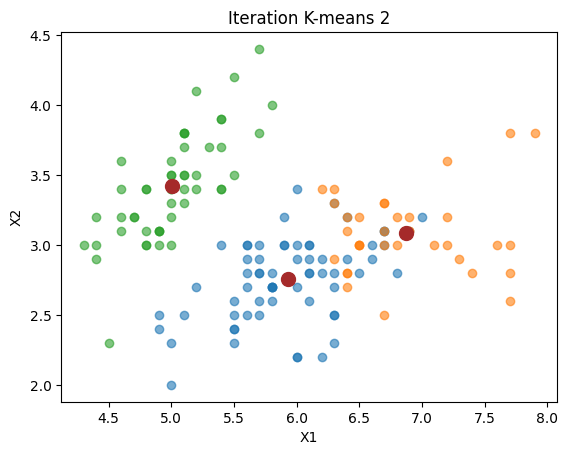

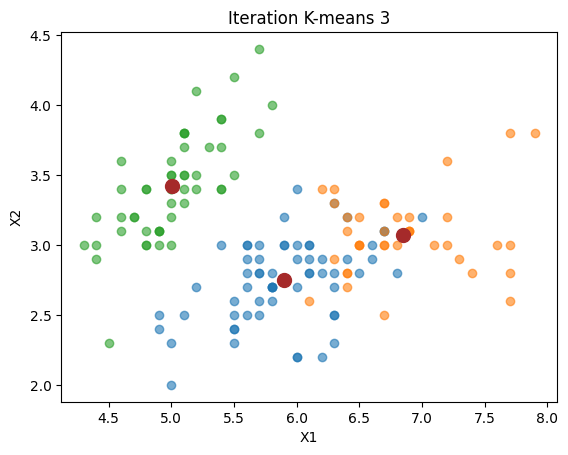

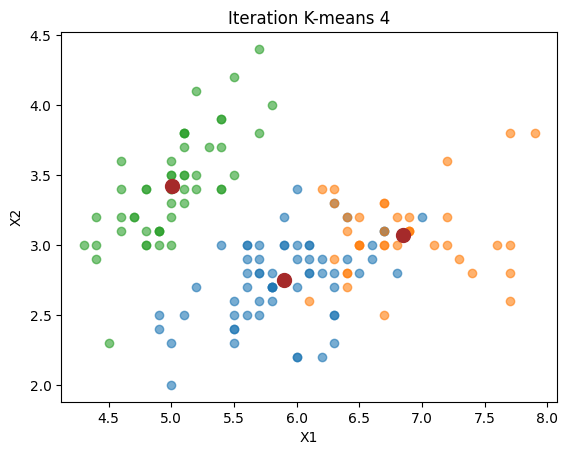

In [95]:
# plot initial centroid
plot_initial(X, np.array(centroids), "Initial K++ 0")

# K-means++: Select remaining centroids
for i in range(2):
    distances = np.min(euclidean_distance(X, np.array(centroids)), axis=1)
    next_centroid = X[np.argmax(distances)]
    centroids.append(next_centroid)
    clusters = assign_clusters(X, np.array(centroids))
    plot(X, np.array(centroids), clusters, f'Iteration K++ {i+1}')

# K-means clustering
for i in range(4):
    clusters = assign_clusters(X, np.array(centroids))
    new_centroids = recompute_centroids(X, clusters, len(centroids))
    plot(X, np.array(new_centroids), clusters, f'Iteration K-means {i+1}')
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

## Implanting KNN classification


In [96]:
# read data
dataset = pd.read_csv('cluster_data2.csv')

In [97]:
# check data
dataset.head()

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


In [98]:
dataset.tail()

,X1,X2,X3,X4
10,6.10,2.87,4.37,1.38
11,6.74,3.04,5.62,1.94
12,4.88,3.33,1.47,0.29
13,6.57,2.94,5.77,2.04
14,6.26,2.85,4.49,1.41


In [99]:
# extract colunms
X_new = dataset[['X1', 'X2', 'X3', 'X4']].values

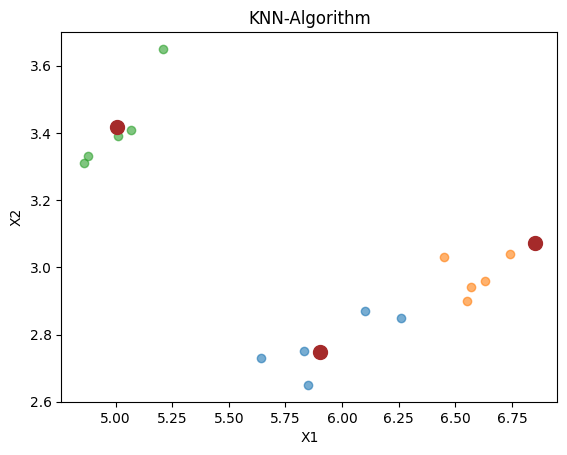

In [100]:
# calculate distance two new points and centroids from question2
distances = euclidean_distance(X_new, centroids)

# assigned nearest
clusters = np.argmin(distances, axis=1)

# plot
plot(X_new[:, :2], np.array(centroids[:, :2]), clusters, f'KNN-Algorithm')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cluster_data1.csv')

# Set random seed
np.random.seed(123)

# Extract the necessary columns for clustering
X = data[['X1', 'X2']].values  # Using X1 and X2 for the 2D plot

# Number of clusters
K = 3

# Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to initialize centroids with K-means++ logic
def initialize_centroids(X, K):
    centroids = []
    
    # Step 1: Pick the first centroid randomly
    first_centroid_idx = np.random.choice(X.shape[0])
    centroids.append(X[first_centroid_idx])
    print(f"First centroid: {X[first_centroid_idx]}")
    
    # Assign all points to this first centroid (all points in one cluster)
    clusters = [X]  # All points are in one cluster initially
    plot_clusters(X, clusters, np.array(centroids), iteration="Init 0")
    
    # Step 2: Iteratively select the remaining centroids using K-means++ logic
    for i in range(1, K):
        # Calculate the distance from each point to the nearest centroid
        distances = np.array([min([euclidean_distance(x, c) for c in centroids]) for x in X])
        
        # Select the point that is farthest from the nearest centroid
        next_centroid_idx = np.argmax(distances)
        centroids.append(X[next_centroid_idx])
        print(f"New centroid: {X[next_centroid_idx]}")
        
        # Assign points to the nearest centroid after adding the new one
        clusters = assign_clusters(X, centroids)
        plot_clusters(X, clusters, np.array(centroids), iteration=f"Init {i}")
    
    return np.array(centroids)

# Function to assign points to the nearest centroids
def assign_clusters(X, centroids):
    clusters = [[] for _ in centroids]
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(x)
    
    return [np.array(cluster) for cluster in clusters]

# Function to recompute centroids based on current clusters
def recompute_centroids(clusters):
    centroids = []
    for cluster in clusters:
        centroids.append(np.mean(cluster, axis=0))
    return np.array(centroids)

# Function to plot clusters and centroids
def plot_clusters(X, clusters, centroids, iteration):
    colors = ['r', 'g', 'b']
    plt.figure()
    for idx, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], s=50, alpha=0.6, color=colors[idx], label=f'Cluster {idx+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='orange', label='Centroids')
    plt.title(f'Iteration {iteration}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

# Main K-means++ function
def kmeans_pp(X, K, max_iters=5):
    # Step 1: Initialize centroids using the revised method (one at a time)
    centroids = initialize_centroids(X, K)
    
    # Step 2: Iterate over the main K-means loop (starting from iteration 1)
    for i in range(1, max_iters + 1):
        # Assign each point to the nearest centroid
        clusters = assign_clusters(X, centroids)
        
        # Recompute centroids by averaging the points in each cluster
        new_centroids = recompute_centroids(clusters)
        
        # Plot the clusters and centroids for each iteration
        plot_clusters(X, clusters, new_centroids, iteration=i)
        
        # If centroids don't change, break the loop (convergence)
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {i}")
            break
        centroids = new_centroids
    
    return centroids, clusters

# Run the K-means++ algorithm
final_centroids, final_clusters = kmeans_pp(X, K, max_iters=4)
